<a href="https://colab.research.google.com/github/Osman-Dawood/Assinment-2/blob/main/lab_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

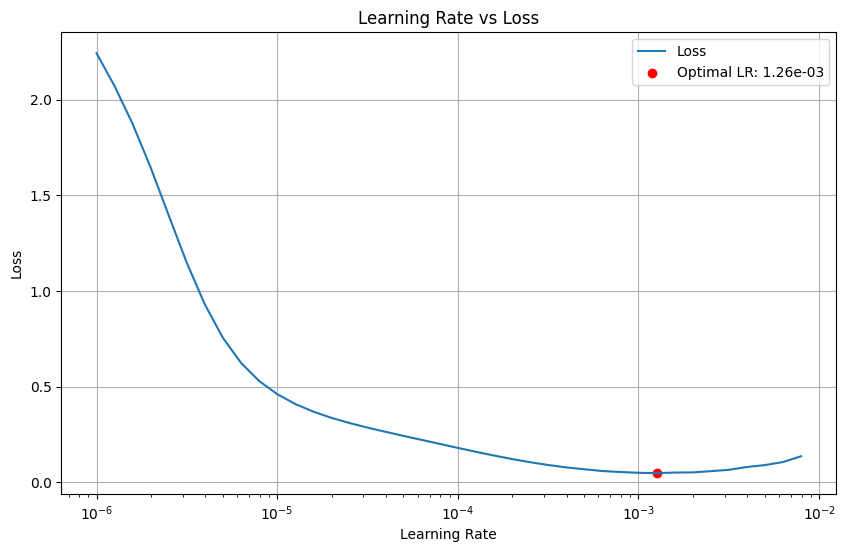

The optimal learning rate is approximately: 1.26e-03
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8833 - loss: 0.4032 - val_accuracy: 0.9646 - val_loss: 0.1191
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9648 - loss: 0.1156 - val_accuracy: 0.9665 - val_loss: 0.1037
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9761 - loss: 0.0769 - val_accuracy: 0.9727 - val_loss: 0.0897
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9829 - loss: 0.0544 - val_accuracy: 0.9719 - val_loss: 0.0829
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9877 - loss: 0.0398 - val_accuracy: 0.9788 - val_loss: 0.0743
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9772 - val_loss: 0.0832
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9790 - val_loss: 0.0715
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━

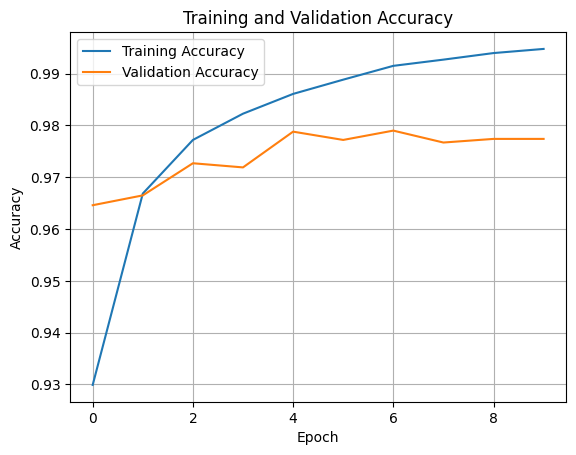

In [11]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the MNIST Dataset
# Loading the MNIST dataset from keras.datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 2: Define a function for finding the optimal learning rate
def find_optimal_lr():
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
        Dense(128, activation='relu'), # Hidden layer with ReLU activation
        Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
    ])

    # Compile the model using Sparse Categorical Crossentropy loss
    model.compile(
        optimizer=Adam(learning_rate=1e-6),  # Start with a very small learning rate
        loss='sparse_categorical_crossentropy'
    )

# Define a function to find the optimal learning rate
def find_optimal_lr():
    # Create a simple model
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the input
        Dense(128, activation='relu'),  # Hidden layer with ReLU
        Dense(10, activation='softmax')  # Output layer for classification
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),  # Start with a very low learning rate
        loss='sparse_categorical_crossentropy'
    )

    # Define a learning rate scheduler
    def lr_schedule(epoch):
        return 1e-6 * 10**(epoch / 10)  # Exponentially increase the learning rate

    lr_callback = LearningRateScheduler(lr_schedule)

    # Train the model with increasing learning rates
    history = model.fit(
        x_train, y_train,
        epochs=40,  # Train for 40 epochs
        callbacks=[lr_callback],  # Use the custom learning rate scheduler
        verbose=0  # Suppress training output
    )

    # Generate learning rates used during training
    lrs = 1e-6 * (10 ** (np.arange(40) / 10))

    # Extract the loss values
    losses = history.history['loss']

    # Find the learning rate with the minimum loss
    min_loss_idx = np.argmin(losses)  # Index of the minimum loss
    optimal_lr = lrs[min_loss_idx]  # Learning rate corresponding to the minimum loss

    # Plot the learning rate vs loss
    plt.figure(figsize=(10, 6))
    plt.semilogx(lrs, losses, label="Loss")  # Plot the learning rate vs loss
    plt.scatter(optimal_lr, losses[min_loss_idx], color='red', label=f"Optimal LR: {optimal_lr:.2e}")  # Mark the optimal learning rate
    plt.xlabel("Learning Rate")
    plt.ylabel("Loss")
    plt.title("Learning Rate vs Loss")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"The optimal learning rate is approximately: {optimal_lr:.2e}")

# Call the function to find the optimal learning rate
find_optimal_lr()

# Step 3: Train the final model using the optimal learning rate
# Rebuild the model with the same architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the images into a 1D vector
    Dense(128, activation='relu'), # Hidden layer with ReLU activation
    Dense(10, activation='softmax') # Output layer for classification
])

# Compile the model with the optimal learning rate
optimal_lr = 0.00126  # this is the optimal learning rate found
model.compile(
    optimizer=Adam(learning_rate=optimal_lr),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']  # Monitor accuracy during training
)

# Use TensorBoard for monitoring training progress
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,  # Train for 10 epochs
    validation_data=(x_test, y_test),  # Use test data for validation
    callbacks=[tensorboard_callback]  # Include TensorBoard callback
)
# Step 4: Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2%}")

test_loss, test_precision = model.evaluate(x_test, y_test)
print(f"Test Precision: {test_precision:.2%}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid()
plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training model with activation function: sigmoid
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.1000 - loss: 2.3930 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.1015 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.0974 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.0981 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1008 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.0958 - loss: 2.3032 - val_accuracy: 0.1000 - val_

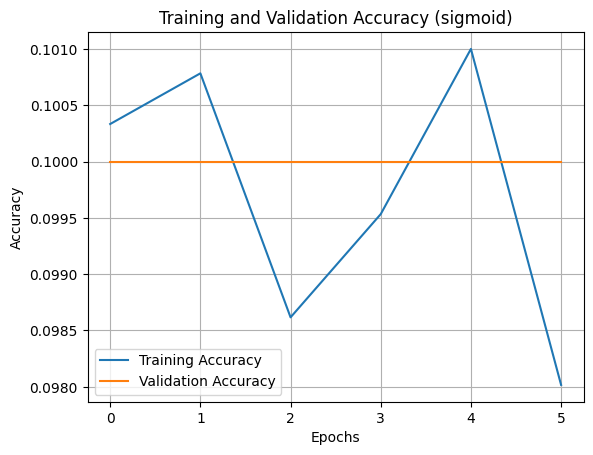


Training model with activation function: relu
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.0972 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0998 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.0980 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1056 - loss: 2.3026
Test Accuracy with relu: 10.00%


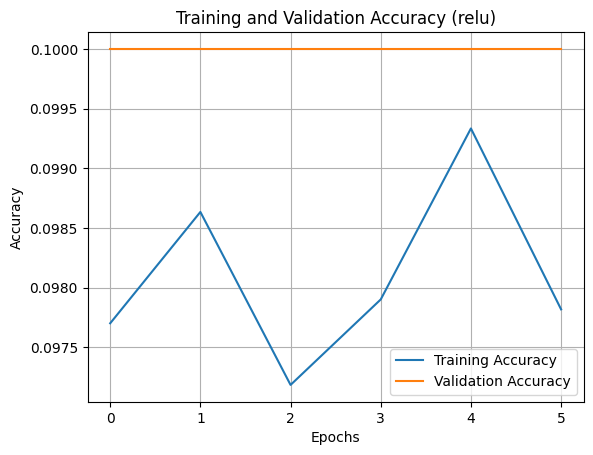


Training model with activation function: elu
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.1433 - loss: 2.1863 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1013 - loss: 2.3022 - val_accuracy: 0.1994 - val_loss: 1.9585
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1392 - loss: 2.1790 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0984 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.0948 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0982 - loss: 2.3032 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.0988 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3030
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accura

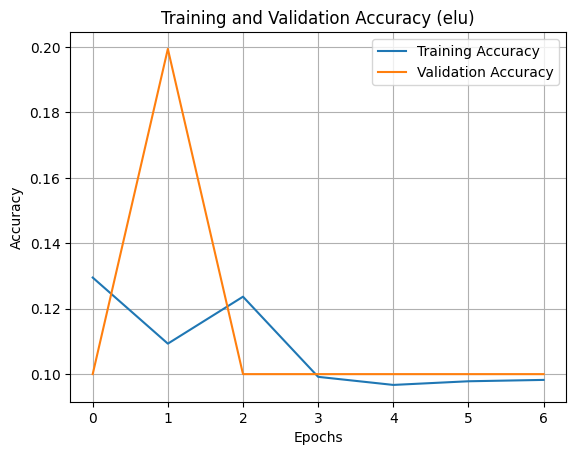


Training model with activation function: selu
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.1002 - loss: 2.3369 - val_accuracy: 0.1000 - val_loss: 2.3031
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1016 - loss: 2.3047 - val_accuracy: 0.1000 - val_loss: 2.3032
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.1000 - loss: 2.3049 - val_accuracy: 0.1000 - val_loss: 2.3045
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1000 - loss: 2.3042 - val_accuracy: 0.1000 - val_loss: 2.3041
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.0991 - loss: 2.3047 - val_accuracy: 0.1000 - val_loss: 2.3044
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.0992 - loss: 2.3043 - val_accuracy: 0.1000 - val_loss: 2.3029
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0993 - loss: 2.3031
Test Accuracy with selu: 10.00%


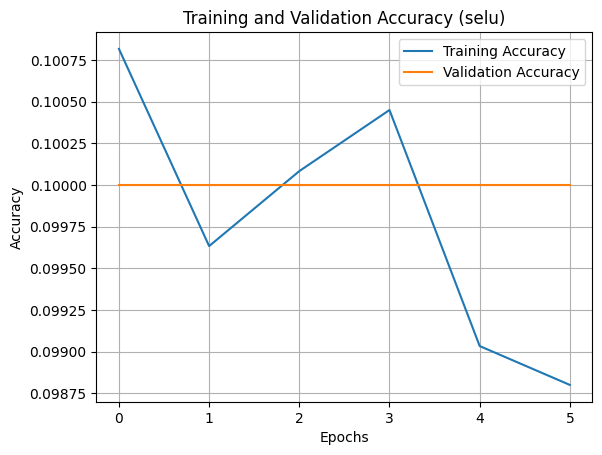

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
# The dataset contains 28x28 grayscale images of 10 fashion categories
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize/ scale pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Function to build a model with a specified activation function
def build_model(activation_function):
    model = Sequential()

    # Flatten the input image (28x28) into a 1D vector
    model.add(Flatten(input_shape=(28, 28)))

    # Add 100 dense layers with the specified activation function
    for _ in range(100):
        model.add(Dense(10, activation=activation_function))

    # Output layer with 10 neurons for classification (softmax activation)
    model.add(Dense(10, activation='softmax'))

    # Compile the model using Adam optimizer and sparse categorical crossentropy loss
    model.compile(
        optimizer=Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Function to train and evaluate the model
def train_and_evaluate(activation_function):
    print(f"\nTraining model with activation function: {activation_function}")

    # Build the model with the given activation function
    model = build_model(activation_function)

    # Use early stopping to stop training if validation accuracy stops improving
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=20,  # Set a maximum of 20 epochs
        batch_size=128,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test Accuracy with {activation_function}: {test_accuracy:.2%}")

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Training and Validation Accuracy ({activation_function})")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Train and evaluate the model with different activation functions
for activation in ['sigmoid', 'relu', 'elu', 'selu']:
    train_and_evaluate(activation)



Training model with optimizer: SGD (Batch Norm: False)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1570 - loss: 3.0155 - val_accuracy: 0.2941 - val_loss: 1.9487
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3036 - loss: 1.9226 - val_accuracy: 0.3403 - val_loss: 1.8072
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3410 - loss: 1.8276 - val_accuracy: 0.3709 - val_loss: 1.7350
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3641 - loss: 1.7599 - val_accuracy: 0.3910 - val_loss: 1.6966
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3796 - loss: 1.7213 - val_accuracy: 0.3837 - val_loss: 1.7320
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3995 - loss: 1.6690 - val_accuracy: 0.3925 - val_loss: 1.6779
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4083 - loss: 1.6424 - val_accuracy: 0.3938 - val_loss: 1.6673
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4180 - loss: 1.6204 - val_accu

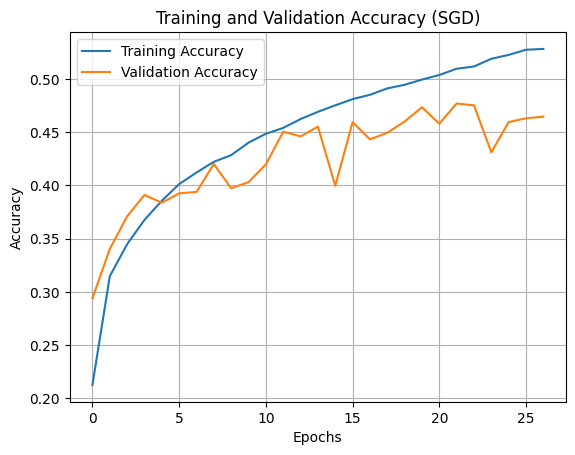


Training model with optimizer: SGD (Batch Norm: True)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.2316 - loss: 2.2448 - val_accuracy: 0.3270 - val_loss: 1.8727
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3792 - loss: 1.7386 - val_accuracy: 0.3592 - val_loss: 1.8047
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.4183 - loss: 1.6400 - val_accuracy: 0.3950 - val_loss: 1.7238
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4386 - loss: 1.5741 - val_accuracy: 0.4200 - val_loss: 1.6224
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.4599 - loss: 1.5149 - val_accuracy: 0.4366 - val_loss: 1.5932
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.4777 - loss: 1.4745 - val_accuracy: 0.4234 - val_loss: 1.6104
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4872 - loss: 1.4421 - val_accuracy: 0.4507 - val_loss: 1.5458
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━

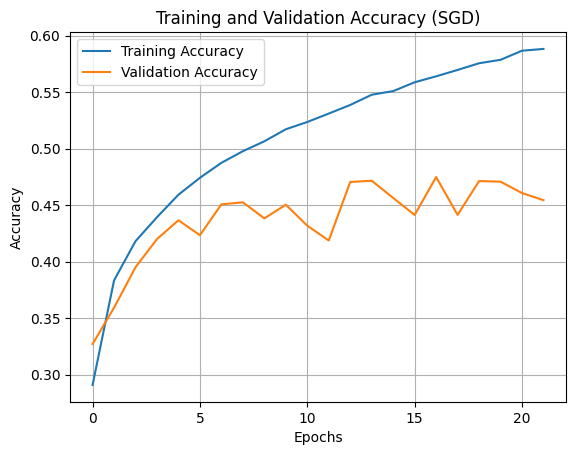


Training model with optimizer: SGD (Batch Norm: False)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.0961 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1020 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1026 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1008 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.1000 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1002 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1001 - loss: nan
Test Accuracy: 10.00%


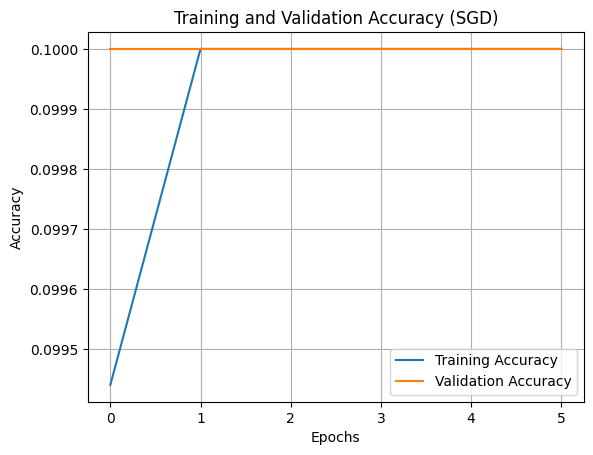


Training model with optimizer: SGD (Batch Norm: True)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.2793 - loss: 2.0464 - val_accuracy: 0.3975 - val_loss: 1.7310
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.4086 - loss: 1.6504 - val_accuracy: 0.3200 - val_loss: 1.9704
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4495 - loss: 1.5407 - val_accuracy: 0.4348 - val_loss: 1.6062
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4758 - loss: 1.4710 - val_accuracy: 0.4239 - val_loss: 1.6527
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4906 - loss: 1.4252 - val_accuracy: 0.4199 - val_loss: 1.6365
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.5076 - loss: 1.3795 - val_accuracy: 0.4536 - val_loss: 1.5332
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5247 - loss: 1.3394 - val_accuracy: 0.4459 - val_loss: 1.6021
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━

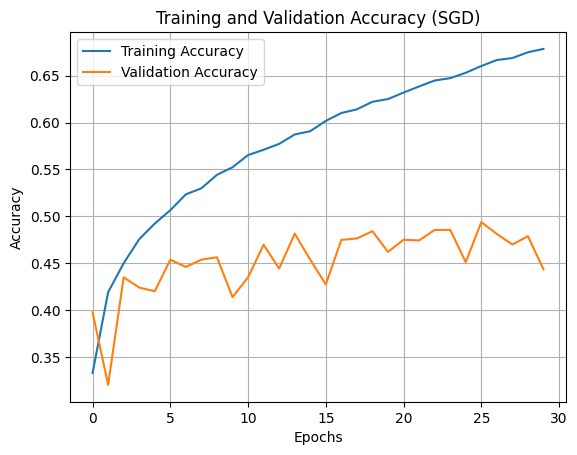


Training model with optimizer: SGD (Batch Norm: False)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.0999 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.1008 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1013 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.0995 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1000 - val_loss: nan
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1001 - loss: nan
Test Accuracy: 10.00%


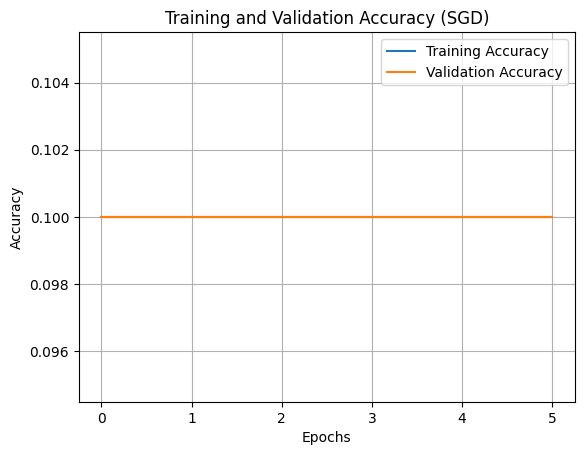


Training model with optimizer: SGD (Batch Norm: True)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.2933 - loss: 2.0120 - val_accuracy: 0.3768 - val_loss: 1.7466
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4203 - loss: 1.6275 - val_accuracy: 0.4077 - val_loss: 1.6396
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.4576 - loss: 1.5137 - val_accuracy: 0.4095 - val_loss: 1.6754
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4818 - loss: 1.4527 - val_accuracy: 0.4425 - val_loss: 1.5638
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4998 - loss: 1.3915 - val_accuracy: 0.4507 - val_loss: 1.5559
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.5222 - loss: 1.3527 - val_accuracy: 0.4637 - val_loss: 1.5270
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5340 - loss: 1.3055 - val_accuracy: 0.4675 - val_loss: 1.5048
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━

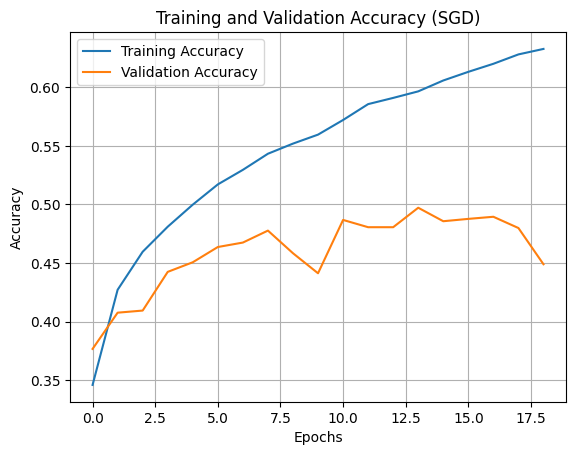


Training model with optimizer: adagrad (Batch Norm: False)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.1995 - loss: 2.2908 - val_accuracy: 0.3293 - val_loss: 1.8559
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3211 - loss: 1.8636 - val_accuracy: 0.3503 - val_loss: 1.7982
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3549 - loss: 1.7782 - val_accuracy: 0.3794 - val_loss: 1.7265
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3800 - loss: 1.7269 - val_accuracy: 0.3950 - val_loss: 1.6863
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.3927 - loss: 1.6829 - val_accuracy: 0.3985 - val_loss: 1.6872
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.4018 - loss: 1.6625 - val_accuracy: 0.3914 - val_loss: 1.6745
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.4097 - loss: 1.6340 - val_accuracy: 0.4116 - val_loss: 1.6563
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━

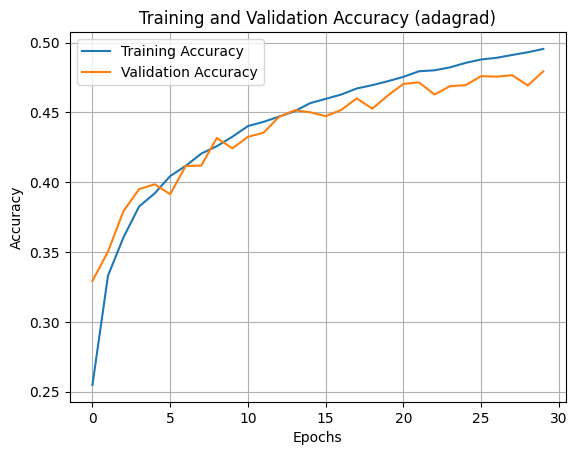


Training model with optimizer: adagrad (Batch Norm: True)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.1773 - loss: 2.4909 - val_accuracy: 0.2678 - val_loss: 2.0813
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.2909 - loss: 2.0008 - val_accuracy: 0.3167 - val_loss: 1.9330
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.3387 - loss: 1.8669 - val_accuracy: 0.3425 - val_loss: 1.8629
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3604 - loss: 1.8019 - val_accuracy: 0.3571 - val_loss: 1.8006
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3753 - loss: 1.7520 - val_accuracy: 0.3755 - val_loss: 1.7620
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.3886 - loss: 1.7140 - val_accuracy: 0.3821 - val_loss: 1.7451
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.4016 - loss: 1.6829 - val_accuracy: 0.3889 - val_loss: 1.7170
Epoch 8/30
391/391 ━━━━━━━━━━━━

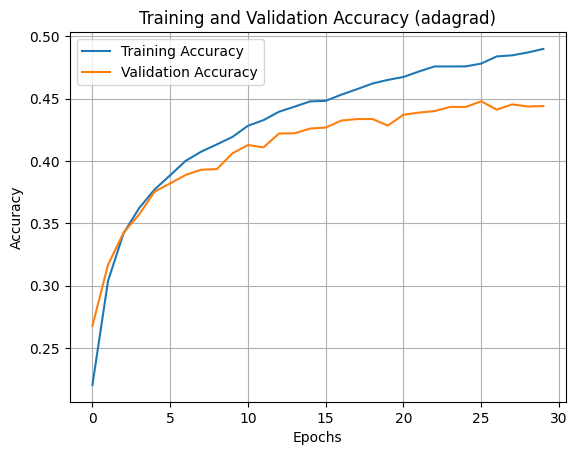


Training model with optimizer: rmsprop (Batch Norm: False)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.1083 - loss: 3.4664 - val_accuracy: 0.1389 - val_loss: 2.2864
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.1787 - loss: 2.1720 - val_accuracy: 0.2664 - val_loss: 2.0073
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2749 - loss: 1.9882 - val_accuracy: 0.3145 - val_loss: 1.9190
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3090 - loss: 1.8960 - val_accuracy: 0.3115 - val_loss: 2.0291
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3312 - loss: 1.8490 - val_accuracy: 0.3344 - val_loss: 1.8106
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3454 - loss: 1.8073 - val_accuracy: 0.3324 - val_loss: 1.8530
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3624 - loss: 1.7666 - val_accuracy: 0.3663 - val_loss: 1.7320
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━

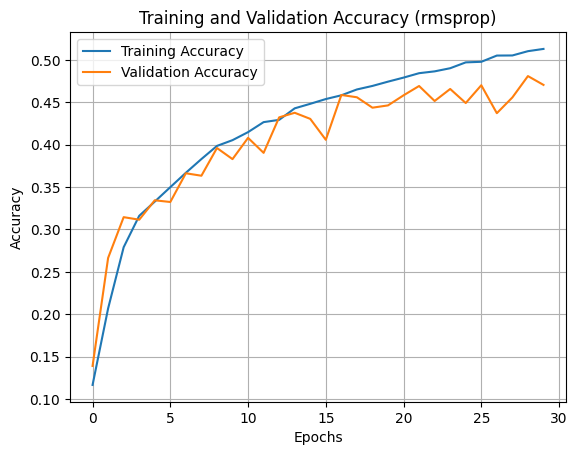


Training model with optimizer: rmsprop (Batch Norm: True)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.2931 - loss: 2.0006 - val_accuracy: 0.3457 - val_loss: 1.8890
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4122 - loss: 1.6404 - val_accuracy: 0.3040 - val_loss: 2.1487
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4551 - loss: 1.5282 - val_accuracy: 0.3439 - val_loss: 1.9299
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - accuracy: 0.4739 - loss: 1.4657 - val_accuracy: 0.3795 - val_loss: 1.7629
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5012 - loss: 1.4054 - val_accuracy: 0.3764 - val_loss: 1.8585
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.5204 - loss: 1.3556 - val_accuracy: 0.4087 - val_loss: 1.6864
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.5337 - loss: 1.3148 - val_accuracy: 0.4340 - val_loss: 1.6146
Epoch 8/30
391/391 ━━━━━━━━━━━━

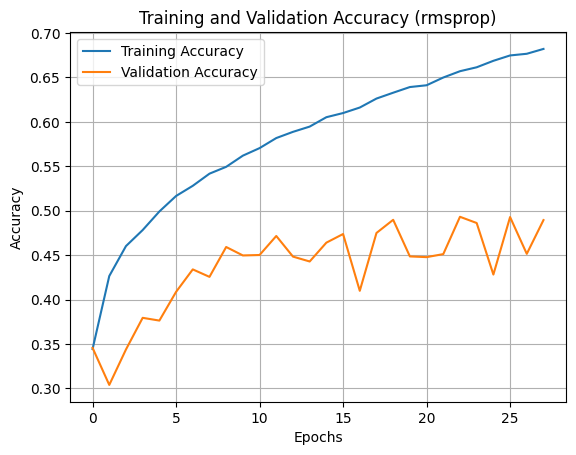


Training model with optimizer: adam (Batch Norm: False)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.1753 - loss: 2.4667 - val_accuracy: 0.3110 - val_loss: 1.8764
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3091 - loss: 1.8803 - val_accuracy: 0.3572 - val_loss: 1.7748
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3559 - loss: 1.7867 - val_accuracy: 0.3666 - val_loss: 1.7304
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3858 - loss: 1.6939 - val_accuracy: 0.3894 - val_loss: 1.6957
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.3910 - loss: 1.6812 - val_accuracy: 0.4129 - val_loss: 1.6324
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4107 - loss: 1.6256 - val_accuracy: 0.4127 - val_loss: 1.6664
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.4243 - loss: 1.6061 - val_accuracy: 0.4496 - val_loss: 1.5438
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━

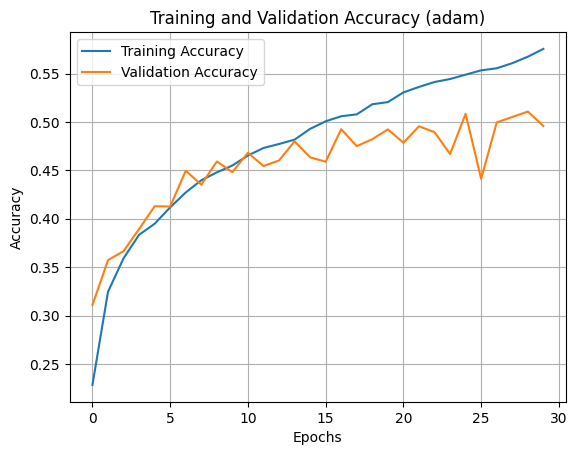


Training model with optimizer: adam (Batch Norm: True)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.3006 - loss: 1.9902 - val_accuracy: 0.3551 - val_loss: 1.9297
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4245 - loss: 1.6122 - val_accuracy: 0.3651 - val_loss: 1.8777
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4569 - loss: 1.5141 - val_accuracy: 0.3946 - val_loss: 1.6848
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4834 - loss: 1.4540 - val_accuracy: 0.3871 - val_loss: 1.7018
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5008 - loss: 1.4053 - val_accuracy: 0.3728 - val_loss: 1.7717
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.5159 - loss: 1.3641 - val_accuracy: 0.4324 - val_loss: 1.6252
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5264 - loss: 1.3310 - val_accuracy: 0.4311 - val_loss: 1.6743
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━

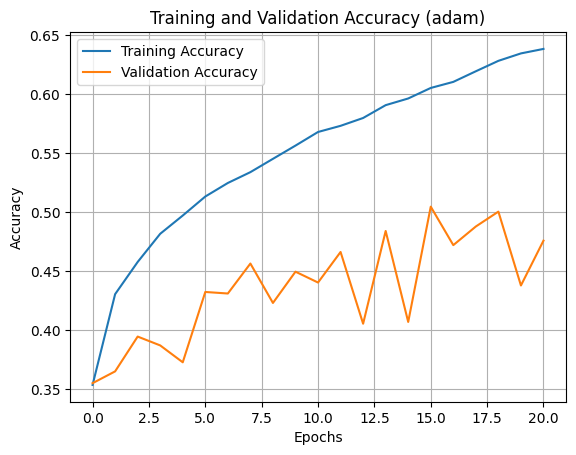


Training model with optimizer: nadam (Batch Norm: False)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.1955 - loss: 2.4488 - val_accuracy: 0.3184 - val_loss: 1.8763
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3503 - loss: 1.7845 - val_accuracy: 0.3938 - val_loss: 1.6776
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.3926 - loss: 1.6782 - val_accuracy: 0.3448 - val_loss: 1.8055
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.4199 - loss: 1.6140 - val_accuracy: 0.4393 - val_loss: 1.6021
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4440 - loss: 1.5574 - val_accuracy: 0.4530 - val_loss: 1.5467
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.4577 - loss: 1.5128 - val_accuracy: 0.4513 - val_loss: 1.5205
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4657 - loss: 1.4920 - val_accuracy: 0.4112 - val_loss: 1.6492
Epoch 8/30
391/391 ━━━━━━━━━━━━━━

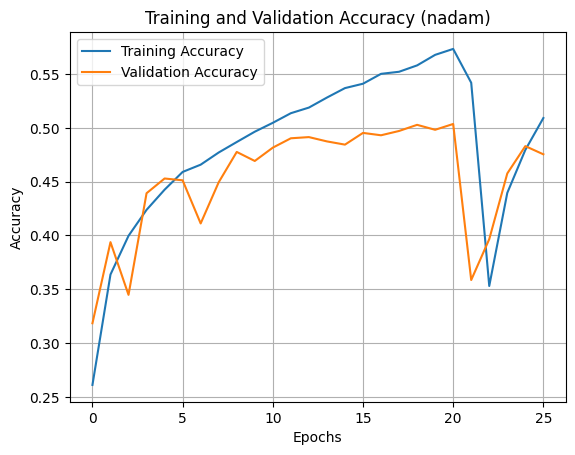


Training model with optimizer: nadam (Batch Norm: True)
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.2954 - loss: 2.0155 - val_accuracy: 0.2967 - val_loss: 2.0205
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.4206 - loss: 1.6211 - val_accuracy: 0.3822 - val_loss: 1.8724
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.4700 - loss: 1.4944 - val_accuracy: 0.4088 - val_loss: 1.6737
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.4889 - loss: 1.4348 - val_accuracy: 0.4036 - val_loss: 1.6851
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.5051 - loss: 1.3913 - val_accuracy: 0.4185 - val_loss: 1.6860
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5238 - loss: 1.3460 - val_accuracy: 0.4269 - val_loss: 1.6383
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5320 - loss: 1.3158 - val_accuracy: 0.4010 - val_loss: 1.7596
Epoch 8/30
391/391 ━━━━━━━━━━━━━━

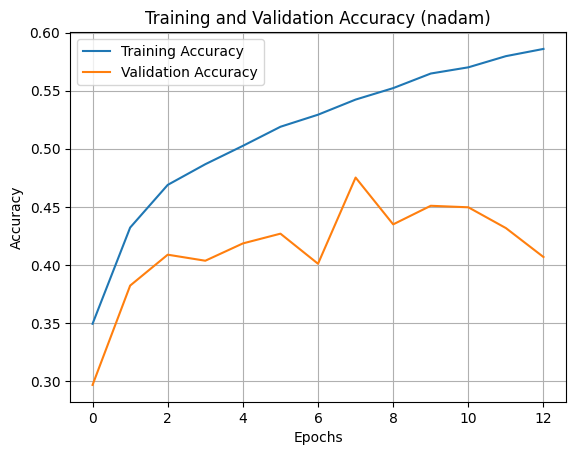

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Function to build a DNN with 20 hidden layers, using He initialization and ELU activation
def build_model(use_batch_norm=False):
    model = Sequential()

    # Flatten the input (32x32x3) into a 1D vector
    model.add(Flatten(input_shape=(32, 32, 3)))

    # Add 20 hidden layers with 100 neurons each
    for _ in range(20):
        model.add(Dense(100, activation='elu', kernel_initializer=HeNormal()))
        if use_batch_norm:
            model.add(BatchNormalization())  # Add Batch Normalization if specified

    # Output layer with 10 neurons (softmax activation) for 10 classes
    model.add(Dense(10, activation='softmax'))

    return model

# Function to train and evaluate the model with different optimization methods
def train_model(optimizer, use_batch_norm=False):
    print(f"\nTraining model with optimizer: {optimizer.get_config()['name']} (Batch Norm: {use_batch_norm})")

    # Build the model
    model = build_model(use_batch_norm=use_batch_norm)

    # Compile the model
    # Create a new optimizer instance within the train_model function
    if optimizer.get_config()['name'] == 'SGD':
        optimizer = tf.keras.optimizers.SGD(**optimizer.get_config()) # Recreate the optimizer
    elif optimizer.get_config()['name'] == 'Nadam':
        optimizer = Nadam(**optimizer.get_config()) # Recreate the optimizer
    else:
        optimizer = optimizer.__class__(**optimizer.get_config()) # Recreate the optimizer for other types

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Use early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=30,  # Set a maximum of 30 epochs
        batch_size=128,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.2%}")

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"Training and Validation Accuracy ({optimizer.get_config()['name']})")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Experiment with different optimizers and configurations
optimizers = [
    tf.keras.optimizers.SGD(),                # Gradient Descent
    tf.keras.optimizers.SGD(momentum=0.9),    # Momentum Optimization
    tf.keras.optimizers.SGD(momentum=0.9, nesterov=True),  # Nesterov Accelerated Gradient
    tf.keras.optimizers.Adagrad(),           # AdaGrad
    tf.keras.optimizers.RMSprop(),           # RMSProp
    tf.keras.optimizers.Adam(),              # Adam
    Nadam()                                  # Nadam
]

# Train the model with and without Batch Normalization
for optimizer in optimizers:
    train_model(optimizer, use_batch_norm=False)  # Without Batch Normalization
    train_model(optimizer, use_batch_norm=True)   # With Batch Normalization
